dog-cat_20%_crossover.jpg :  <tabby_cat>:  0.00029031679150648415   <samoyed>:  0.7837421894073486
dog-cat_40%_crossover.jpg :  <tabby_cat>:  0.11293666064739227   <samoyed>:  0.031135549768805504
dog-cat_60%_crossover.jpg :  <tabby_cat>:  0.27674615383148193   <samoyed>:  0.0009145024814642966
dog-cat_80%_crossover.jpg :  <tabby_cat>:  0.3732132613658905   <samoyed>:  4.7388708480866626e-05
<tabby_cat>:  0.32209181785583496   <samoyed>:  2.205410538635988e-07


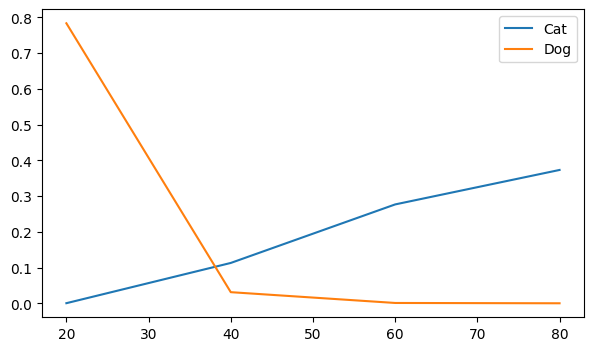

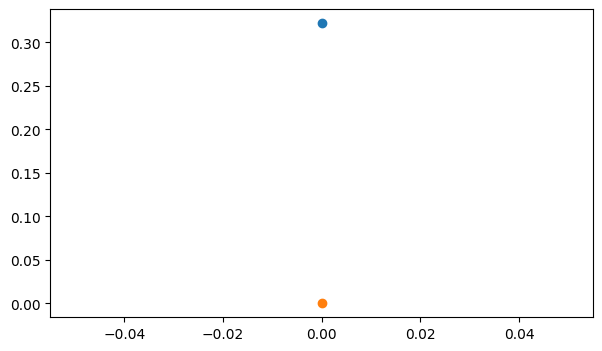

In [90]:
import torch
import os
from torchvision import models, transforms
from PIL import Image
import requests
import torch.nn.functional as F
import matplotlib.pyplot as plt

def load_model():
    # Load the pre-trained ResNet model
    model = models.resnet50(pretrained=True)
    model.eval()  # Set the model to evaluation mode


def input_data(path_list):
    # Define the transformation for input images
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    # Load and preprocess the input image
    image_path = path_list  # Replace with the actual path to your image
    image = Image.open(image_path)
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension
    return input_batch

def make_prediction(input_batch):
    # Make predictions
    with torch.no_grad():
        output = model(input_batch)
    
    # Apply softmax to get probabilities
    probabilities = F.softmax(output[0], dim=0)
    #print(probabilities)
    return probabilities

# # Load ImageNet labels
# labels_url = 'https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json'
# response = requests.get(labels_url)
# labels = response.json()

def get_probabilities(probabilities):
    # Get the predicted class index and probability
    predicted_prob, predicted_idx = torch.max(probabilities, 0)
    predicted_label = labels[predicted_idx.item()]

    samoyed = 258
    tabby_cat = 281

    print("<tabby_cat>: ", probabilities[tabby_cat].item(), " ", "<samoyed>: ", probabilities[samoyed].item())

    return probabilities[tabby_cat].item(), probabilities[samoyed].item()

# print(f"Predicted animal: {predicted_label}")
# print(f"Probability: {predicted_prob.item() * 100:.2f}%")
def data_plot(list1, list2, list3):
    plt.figure(figsize=(7,4))
    plt.plot(list1, list2, label = "Cat")
    plt.plot(list1, list3, label = "Dog")
    plt.legend()

if __name__=="__main__":
    base_path = r"E:\linshi0823\GWU\coursework\202401_Intro to Computer Vision_CSCI_6527_80\Project1_catdogs\\"
    method1 = r"Crossover\\"
    method2 = r"JPEG Compressed\\"
    method3 = r"Noised\\"
    list1 = os.listdir(r"E:\linshi0823\GWU\coursework\202401_Intro to Computer Vision_CSCI_6527_80\Project1_catdogs\Crossover")
    list2 = os.listdir(r"E:\linshi0823\GWU\coursework\202401_Intro to Computer Vision_CSCI_6527_80\Project1_catdogs\JPEG Compressed")
    list3 = os.listdir(r"E:\linshi0823\GWU\coursework\202401_Intro to Computer Vision_CSCI_6527_80\Project1_catdogs\Noised")

    load_model()
    catList = []
    dogList = []
    for pic in list1:
        print(pic, ": ", end=" ")
        input_batch=input_data(base_path + method1 + pic )
        probabilities=make_prediction(input_batch)
        catP, dogP = get_probabilities(probabilities)
        catList.append(catP)
        dogList.append(dogP)
    data_plot([20,40,60,80], catList, dogList)

    catList = []
    dogList = []
    tobby_cat = base_path + "tabby_cat4.jpg"
    input_batch=input_data(tobby_cat)
    probabilities=make_prediction(input_batch)
    catP, dogP = get_probabilities(probabilities)
    catList.append(catP)
    dogList.append(dogP)
    plt.figure(figsize=(7,4))
    plt.scatter([0],catList)
    plt.scatter([0],dogList)
    
    
